In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples_bkg = [
    "2Mu2e_200GeV_0p25GeV_0p01mm",
]

In [3]:
fileset_bkg = utilities.make_fileset(samples_bkg, "cutdecay_false_2mu2e", location_cfg="signal_v10.yaml")

events_bkg = {}

for i in tqdm(samples_bkg):
    fname = fileset_bkg[i][0]
    print(fname)
    events_bkg[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/1 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-200_MDp-0p25_ctau-0p01_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-200_MDp-0p25_ctau-0p01_v3_part-0.root


In [4]:
events_bkg['2Mu2e_200GeV_0p25GeV_0p01mm'].fields

['LHEPart',
 'SubJet',
 'SoftActivityJetHT',
 'SoftActivityJetNjets2',
 'L1',
 'fixedGridRhoFastjetCentral',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'Flag',
 'GenDressedLepton',
 'Electron',
 'LHEScaleWeight',
 'PatDSAMuonVertexRefittedTracks',
 'fixedGridRhoFastjetCentralCalo',
 'FsrPhoton',
 'L1Reco',
 'RawPuppiMET',
 'CorrT1METJet',
 'DSAMuonVertexRefittedTracks',
 'SoftActivityJetNjets5',
 'HLT',
 'SV',
 'Generator',
 'SoftActivityJetHT10',
 'PSWeight',
 'FatJet',
 'SubGenJetAK8',
 'DSAMuon',
 'CaloMET',
 'event',
 'GenJetAK8',
 'ChsMET',
 'Muon',
 'SoftActivityJetHT5',
 'GenIsolatedPhoton',
 'PV',
 'IsoTrack',
 'Jet',
 'LHEWeight',
 'LHEReweightingWeight',
 'DeepMETResponseTune',
 'L1PreFiringWeight',
 'LHE',
 'fixedGridRhoFastjetAll',
 'DSAMuonVertex',
 'PatMuonVertex',
 'HTXS',
 'GenVisTau',
 'OtherPV',
 'TrigObj',
 'SoftActivityJetNjets10',
 'fixedGridRhoFastjetCentralNeutral',
 'GenMET',
 'luminosityBlock',
 'TkMET',
 'MET',
 'GenJet',
 'HLTriggerFinalPath',
 'RawMET',
 '

In [5]:
events_bkg['2Mu2e_200GeV_0p25GeV_0p01mm'].Muon.pt

<Array [[56.6, 38.2, 3.26], ... [51.9, 35.8]] type='1899 * var * float32[paramet...'>

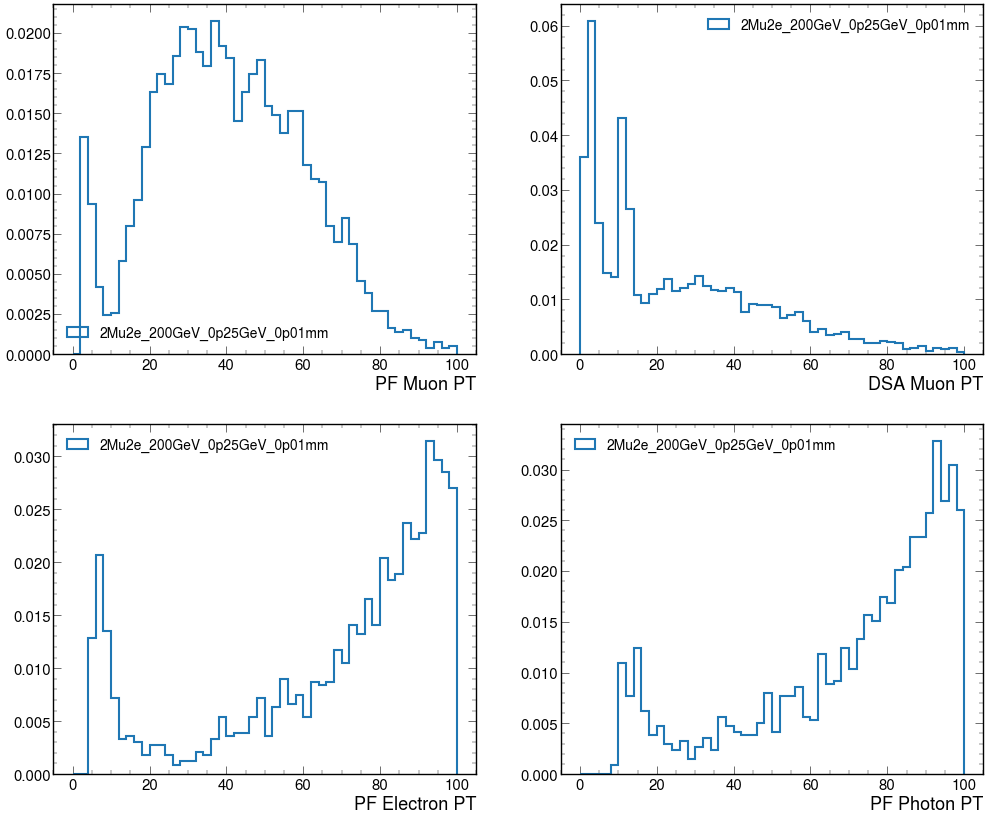

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for bkg in samples_bkg:
    
    ax[0,0].hist(ak.flatten(events_bkg[bkg].Muon.pt), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[0,1].hist(ak.flatten(events_bkg[bkg].DSAMuon.pt), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,0].hist(ak.flatten(events_bkg[bkg].Electron.pt), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,1].hist(ak.flatten(events_bkg[bkg].Photon.pt), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    
ax[0,0].set_xlabel('PF Muon PT')
ax[0,1].set_xlabel('DSA Muon PT')
ax[1,0].set_xlabel('PF Electron PT')
ax[1,1].set_xlabel('PF Photon PT')

ax[0,0].legend(fontsize=20)
ax[0,1].legend(fontsize=20)
ax[1,0].legend(fontsize=20)
ax[1,1].legend(fontsize=20)

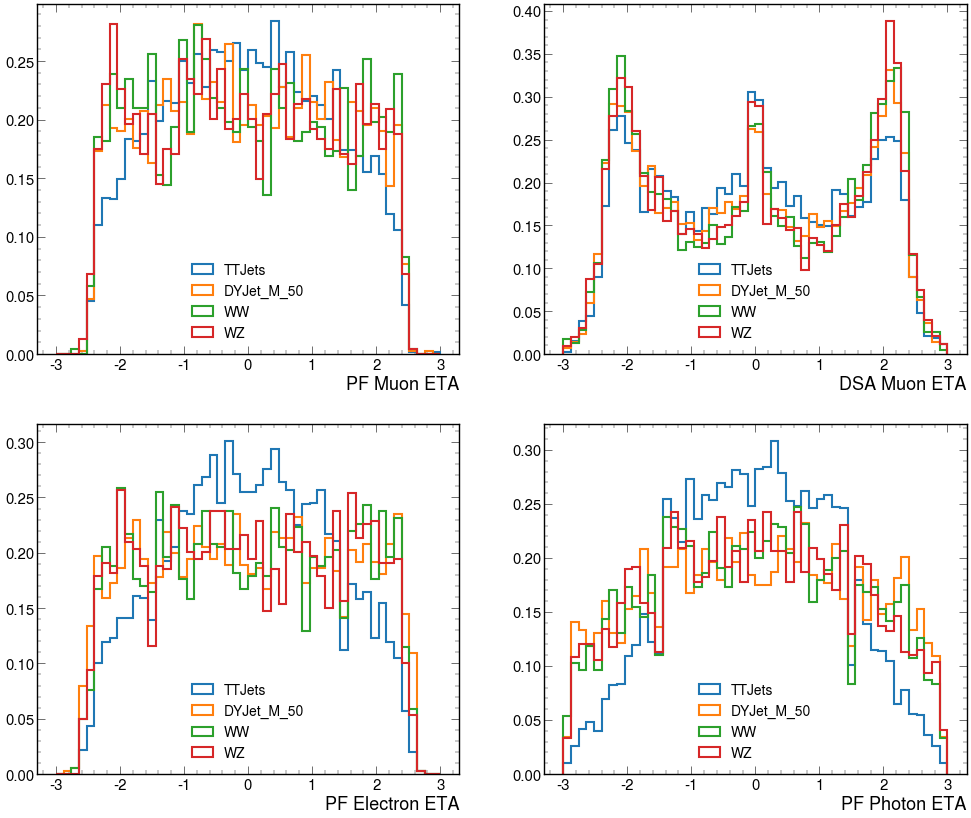

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for bkg in samples_bkg:
    
    ax[0,0].hist(ak.flatten(events_bkg[bkg].Muon.eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[0,1].hist(ak.flatten(events_bkg[bkg].DSAMuon.eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,0].hist(ak.flatten(events_bkg[bkg].Electron.eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,1].hist(ak.flatten(events_bkg[bkg].Photon.eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    
ax[0,0].set_xlabel('PF Muon ETA')
ax[0,1].set_xlabel('DSA Muon ETA')
ax[1,0].set_xlabel('PF Electron ETA')
ax[1,1].set_xlabel('PF Photon ETA')

ax[0,0].legend(fontsize=20)
ax[0,1].legend(fontsize=20)
ax[1,0].legend(fontsize=20)
ax[1,1].legend(fontsize=20)

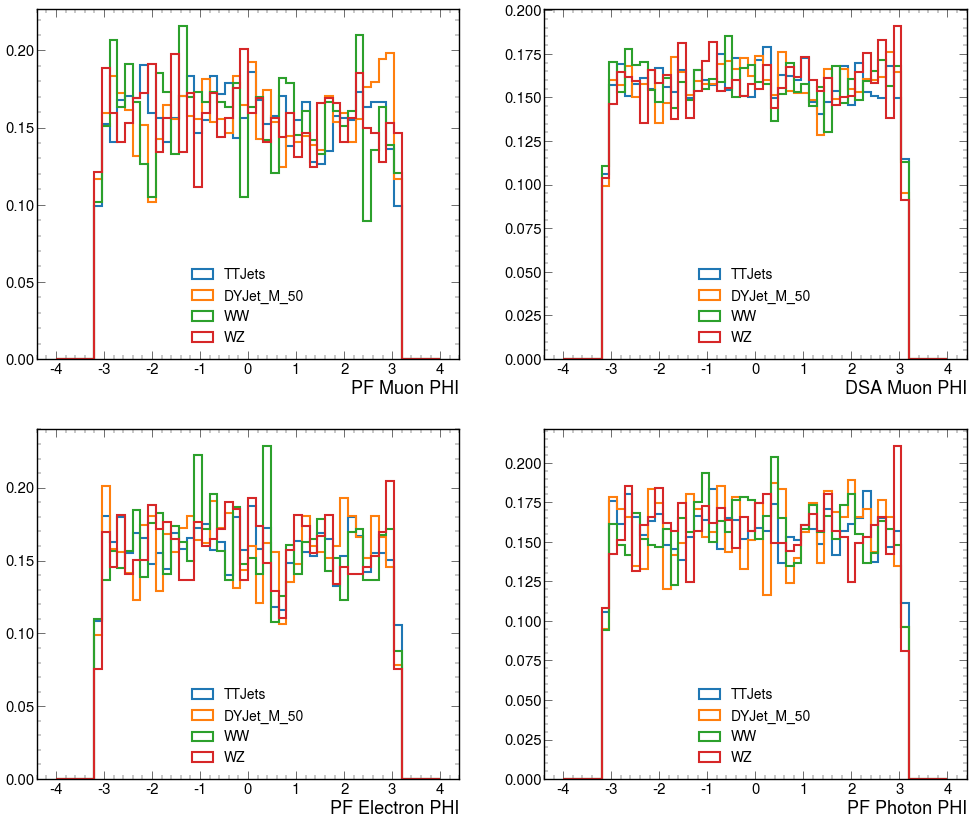

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for bkg in samples_bkg:
    
    ax[0,0].hist(ak.flatten(events_bkg[bkg].Muon.phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[0,1].hist(ak.flatten(events_bkg[bkg].DSAMuon.phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,0].hist(ak.flatten(events_bkg[bkg].Electron.phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    ax[1,1].hist(ak.flatten(events_bkg[bkg].Photon.phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=bkg, density=True)
    
ax[0,0].set_xlabel('PF Muon PHI')
ax[0,1].set_xlabel('DSA Muon PHI')
ax[1,0].set_xlabel('PF Electron PHI')
ax[1,1].set_xlabel('PF Photon PHI')

ax[0,0].legend(fontsize=20)
ax[0,1].legend(fontsize=20)
ax[1,0].legend(fontsize=20)
ax[1,1].legend(fontsize=20)